In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager

# Axes对象
Figure容器是最顶层的容器，他几乎包含了这个图的所有对象。通过add_subplot和add_axes方法可以添加Axes对象，这两个方法添加的都是Axes及其子类的对象。添加完成后是存储在figure.axes中

Axes(0,0;1x0.3)
[<AxesSubplot:>]
AxesSubplot(0.125,0.536818;0.352273x0.343182)


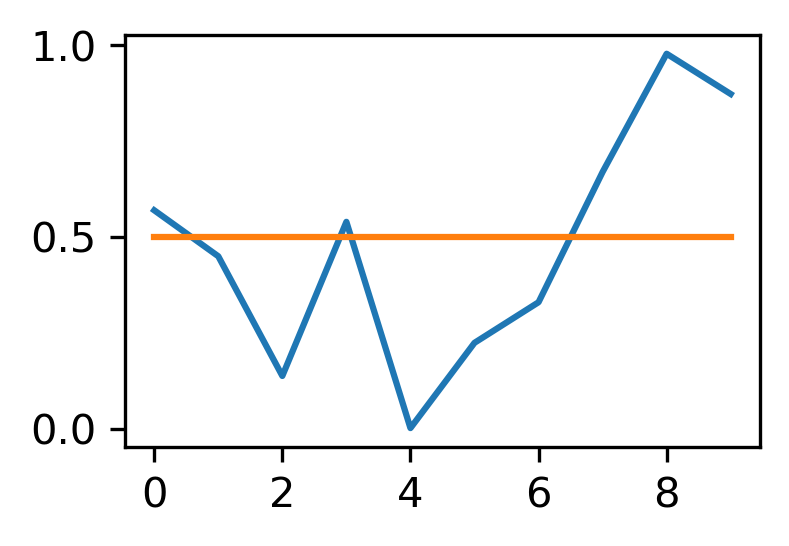

In [7]:
# 创建Figure容器
fig = plt.figure(dpi=300)
# 在画板上添加Axes对象
    # 法1
ax1 = fig.add_subplot(221)
    # 法2
ax2 = fig.add_axes([0,0,1,0.3])

# 切换到ax1对象,再绘图
fig.sca(ax1)
plt.plot(np.random.rand(10))

# 切换到ax2对象,再绘图
fig.sca(ax2)
plt.plot(np.random.rand(10))

# 指定对象绘图
ax1.plot([0.5 for x in range(len(np.random.rand(10)))])
ax2.plot([0.5 for x in range(len(np.random.rand(10)))])

# 获取当前Axes对象
print(fig.gca())

# 删除Axes对象
fig.delaxes(ax2)

# 获取所有Axes对象
print(fig.axes)
for ax in fig.axes:
    print(ax)

# Axes容器
Axes容器是用来创建具体的图形的。比如画曲线，柱状图，都是画在上面。所以之前我们学的使用plt.xx绘制各种图形（比如条形图，直方图，散点图等）都是对Axes的封装。比如plt.plot对应的是axes.plot，比如plt.hist对应的是axes.hist。针对图的所有操作，都可以在Axes上找到对应的API。另外后面要讲到的Axis容器，是轴的对象，也是绑定在Axes上面。

### 设置x轴与y轴的最大值和最小值

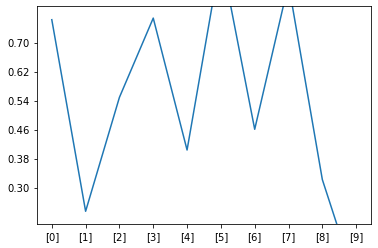

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(np.random.rand(10))
#复习
plt.sca(ax1)
plt.xticks(np.arange(10),["[%x]" % x for x in np.arange(10)])
#新知识点
ax1.set_ylim(0.2,0.8)
ax1.set_yticks(np.linspace(0.3,0.7,6))

### 设置文本

<ipython-input-4-3da3ef6fc371>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


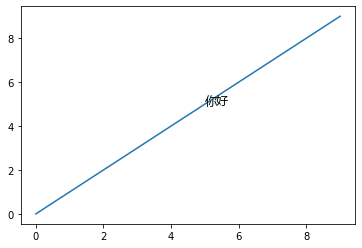

In [4]:
font = font_manager.FontProperties(fname=r"C:\\Windows\\Fonts\\msyh.ttc",size=12)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(10))
#axes(x,y,text)，x,y是坐标，text是文本内容
ax1.text(5,5,"你好",fontdict={"fontproperties":font})
fig.show()

### 绘制双Y轴

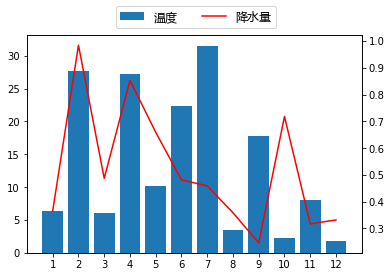

In [5]:
fig = plt.figure()
#第一个y轴
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(1,13),np.random.rand(12)*35,label="温度")
    #调整
ax1.set_xticks(np.arange(1,13))
ax1.set_xlim(0,13)

#第二个y轴
ax2 = ax1.twinx()
ax2.plot(np.arange(1,13),np.random.rand(12),c="r",label="降水量")

#绘制图例
fig.legend(prop=font,loc="upper center",ncol=2,fontsize=5)

# Axis容器

## 设置x轴和y轴label的位置

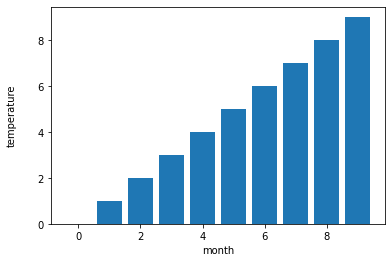

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(range(10), range(10))
ax1.set_ylabel("temperature")
ax1.yaxis.set_label_coords(-0.1, 0.5)  #可以设置fontproperties参数
ax1.set_xlabel("month")
ax1.xaxis.set_label_coords(0.5,-0.1)

## 设置刻度

### 隐藏刻度

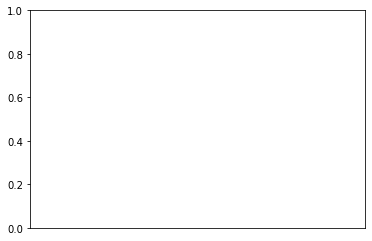

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(True)

### 设置刻度格式

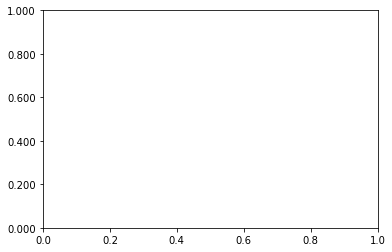

In [14]:
from matplotlib import ticker
fig = plt.figure()
ax1 = fig.add_subplot(111)
formatter = ticker.FormatStrFormatter("%.3f")
ax1.yaxis.set_major_formatter(formatter)

### 设置刻度属性

<class 'matplotlib.text.Text'>
<class 'list'> None


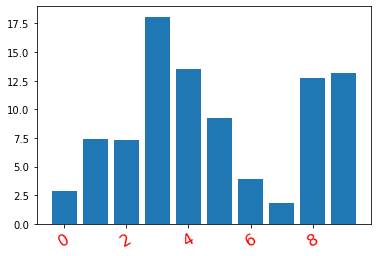

In [23]:
from matplotlib import ticker
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(0,10),np.random.rand(10)*20,label="温度")
xticklabels = ax1.xaxis.get_ticklabels()
for xticklabel in xticklabels:   #xticklabel属于matplotlib.text类
    xticklabel.set_color("r")
    xticklabel.set_rotation(30)
    xticklabel.set_fontsize(16)
print(type(xticklabels),print(type(xticklabels[0])))

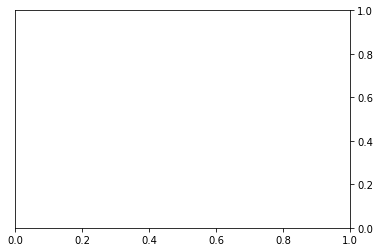

In [40]:
#将y轴刻度位置换到右边
from matplotlib import ticker
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.tick_right()

## 设置刻度轴

### 设置刻度轴属性

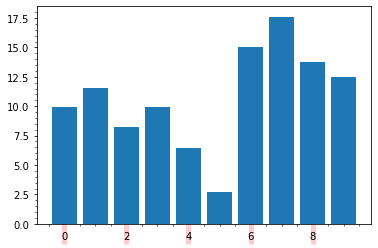

In [34]:
from matplotlib import ticker
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(0,10),np.random.rand(10)*20,label="温度")

xlines = ax1.xaxis.get_ticklines()
for xline in xlines:
    xline.set_markeredgecolor("red")
    xline.set_alpha(0.2)
    xline.set_markersize(20) #设置长度
    xline.set_markeredgewidth(5) #设置宽度
    
#打开次要刻度
ax1.minorticks_on()

# 笔记：
1. 图的构成：Figure是一个画板，上面可以有很多的axes对象，每个axes对象中有轴（Axis），有线条，有Legend，有title等。
2. Figure上的相关操作，基本的都是对Axes的一些操作。
    * 添加axes：add_subplot(221)/add_axes([left,bottom,width,height])
    * 当前的axes：fig.gca()获取当前的axes，fig.sca(axes)设置当前的axes。
    * 删除axes：fig.delaxes(axes)
    * 获取所有的axes：fig.axes保存了所有的axes对象。

3. Axes对象：大部分的图形元素都是绘制在Axes上。比如条形，折线等。
    * 通过set_xlim和set_ylim可以设置x和y轴的最大值和最小值。
    * 通过text可以在Axes对象上添加文本。只需要指定x和y的坐标以及文字内容就可以了。
    * 添加双Y轴，原理是两个Axes对象堆叠在一起。通过ax.twinx()来克隆出一个新的axes对象。

4. Axis对象：代表的是x轴和y轴的对象。可以设置x轴的标题样式，刻度线条样式，刻度文本样式等。

5. Tick对象：一般用来控制轴的位置，比如可以控制y轴显示在右边，x轴可以显示在上面等。# # 笔记：
6. https://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis